In [9]:
import pandas as pd 
import numpy as np 
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
iris_data = pd.read_csv('iris.csv')
print(iris_data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

In [13]:
np_iris = iris_data.to_numpy()

In [14]:
X_data = np_iris[:,0:4]
Y_data = np_iris[:,4]

In [15]:
print("\nFeature before Scaling :\n-------------------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n-------------------------------------------------")
print(Y_data[:5])


Feature before Scaling :
-------------------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
-------------------------------------------------
[0. 0. 0. 0. 0.]


In [16]:
scaler = StandardScaler().fit(X_data)

X_data = scaler.transform(X_data)

Y_data = tf.keras.utils.to_categorical(Y_data, 3)

In [17]:
print("\nFeature after Scaling :\n-------------------------------------------------")
print(X_data[:5,:])
print("\nTarget after scaling :\n-------------------------------------------------")
print(Y_data[:5,:])


Feature after Scaling :
-------------------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after scaling :
-------------------------------------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data, Y_data, test_size=0.10)

print("\nTrain test Dimension\n----------------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train test Dimension
----------------------------------------------
(135, 4) (135, 3) (15, 4) (15, 3)


In [24]:
from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3

#Create a sequential model in keras 
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                #number of nodes
                             input_shape=(4,),   #number of input variables
                             name='Hidden_Layer-1', #Logical name
                             activation='relu')) #activation function

#Add second Hidden layer
model.add(keras.layers.Dense(128,
                             name='Hidden_Layer-2',
                             activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output_Layer',
                             activation='softmax'))

#compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#print the model meta-data
model.summary()

c:\Users\chakr\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#make it verbose so we can see the progress
VERBOSE=1

#setup HYper parameters for training

#set Batch size
BATCH_SIZE = 16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining progress :\n -----------------------------------------------------")

# Fit the model. This will perform the entire training cycle, including  
# forward propagation, loss computation, backward propagation and gradient descent. 
# Execute for the specified batch size and epoch
# perform validation after each epoch

history= model.fit(X_train,
                   Y_train,
                   batch_size = BATCH_SIZE,
                   epochs = EPOCHS,
                   verbose = VERBOSE,
                   validation_split = VALIDATION_SPLIT)

print("\nAccuracy during Training :\n---------------------------------------------")



Training progress :
 -----------------------------------------------------
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.7407 - loss: 0.7919 - val_accuracy: 0.6667 - val_loss: 0.7565
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8519 - loss: 0.5106 - val_accuracy: 0.7037 - val_loss: 0.6473
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8519 - loss: 0.4066 - val_accuracy: 0.7037 - val_loss: 0.5688
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8704 - loss: 0.3460 - val_accuracy: 0.8148 - val_loss: 0.4875
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8704 - loss: 0.3071 - val_accuracy: 0.7778 - val_loss: 0.4651
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8796 - loss: 0.2777 - val_accuracy: 0.8519 - val_loss: 0.4049
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8889 - loss: 0.2583 - val_accuracy: 0.8519 - val_loss: 0.3928
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 

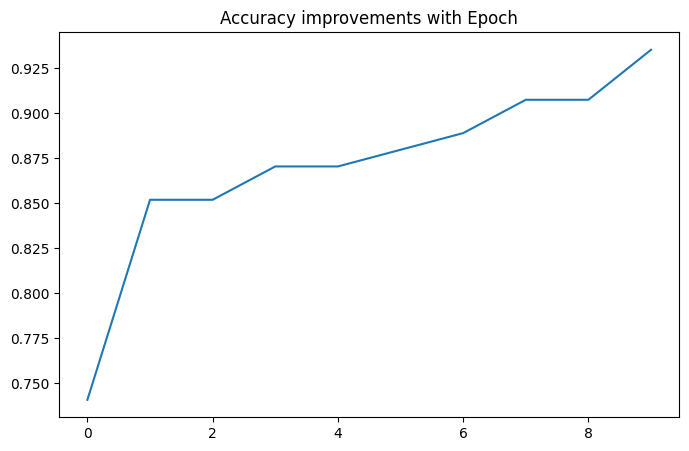


Evaluation against Test Dataset :
------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.9333 - loss: 0.2627


[0.2627047002315521, 0.9333333373069763]

In [26]:
import matplotlib.pyplot as plt 

#plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------------------------------------")
model.evaluate(X_test, Y_test )

In [29]:
#Saving the model

model.save("iris_save.keras")

#loading a model
loaded_model = keras.models.load_model("iris_save.keras")

#print model summary
loaded_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,080 (137.04 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,541 (68.52 KB)

In [31]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Predintion output (Probabilities) :", raw_prediction)

#find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ",label_encoder.inverse_transform([prediction]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Raw Predintion output (Probabilities) : [[0.03290422 0.6770957  0.29000008]]
Prediction is  ['versicolor']
